# Final Version of Assignment 2

In [1]:
import pandas as pd
import requests
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Feature Engineering

In [2]:
#data_filename='data/energydata_complete.csv'

In [3]:
#df=pd.read_csv(data_filename,parse_dates=['date'])

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df=pd.read_csv(url,parse_dates=['date'])

In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
#Check types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

Add some features

In [7]:
df=df.sort_values(by=['date'], ascending=True, axis=0)
df['Consumption']=df['Appliances']+df['lights']
df['Hour']=pd.to_datetime(df['date'],infer_datetime_format=True).dt.hour
df['Day']=pd.to_datetime(df['date'],infer_datetime_format=True).dt.day
df['Months']=pd.to_datetime(df['date'],infer_datetime_format=True).dt.month
df['Daytype']=pd.to_datetime(df['date'],infer_datetime_format=True).dt.weekday

In [8]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Consumption,Hour,Day,Months,Daytype
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,7.000000,63.000000,5.300000,13.275433,13.275433,90,17,11,1,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,18.606195,90,17,11,1,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.333333,55.333333,5.100000,28.642668,28.642668,80,17,11,1,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.000000,51.500000,5.000000,45.410389,45.410389,90,17,11,1,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,10.084097,100,17,11,1,0
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,5.333333,43.833333,4.800000,44.919484,44.919484,90,17,11,1,0
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,5.000000,40.000000,4.700000,47.233763,47.233763,110,18,11,1,0
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,5.166667,40.000000,4.683333,33.039890,33.039890,110,18,11,1,0
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,5.333333,40.000000,4.666667,31.455702,31.455702,100,18,11,1,0
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,5.500000,40.000000,4.650000,3.089314,3.089314,110,18,11,1,0


Check consumption's behaviour during business hours and weekends

In [9]:
def weekday(weekno):
    if weekno<5:
        return 1  #weekday
    else:
        return 0  #Weekend

In [10]:
 def BusinessHour(pdate):
     if pdate>=pd.to_datetime ('09:00:00').hour and pdate<pd.to_datetime  ('17:00:00').hour:
         return 1 #"BusinessHour"
     else:
         return 0 # "No BusinessHour"

In [11]:
df['BusinessHour']=df['Hour'].apply(BusinessHour)
df['Daytype']=df['Daytype'].apply(weekday)
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,Consumption,Hour,Day,Months,Daytype,BusinessHour
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,63.000000,5.300000,13.275433,13.275433,90,17,11,1,1,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,59.166667,5.200000,18.606195,18.606195,90,17,11,1,1,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,55.333333,5.100000,28.642668,28.642668,80,17,11,1,1,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,51.500000,5.000000,45.410389,45.410389,90,17,11,1,1,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,47.666667,4.900000,10.084097,10.084097,100,17,11,1,1,0
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,43.833333,4.800000,44.919484,44.919484,90,17,11,1,1,0
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,40.000000,4.700000,47.233763,47.233763,110,18,11,1,1,0
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,40.000000,4.683333,33.039890,33.039890,110,18,11,1,1,0
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,40.000000,4.666667,31.455702,31.455702,100,18,11,1,1,0
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,40.000000,4.650000,3.089314,3.089314,110,18,11,1,1,0


Grouping consumption per hour(intra month) to realize whether consumption is related with time.

In [12]:
df_hour=df.groupby(['Hour']).Consumption.mean()
df_hour=df_hour.to_frame().reset_index()
df_hour

,Hour,Consumption
0,0,55.973236
1,1,52.627737
2,2,49.501217
3,3,48.540146
4,4,49.562044
5,5,53.381995
6,6,58.795620
7,7,82.116788
8,8,110.437956
9,9,117.323601


Text(0, 0.5, 'Consumption')

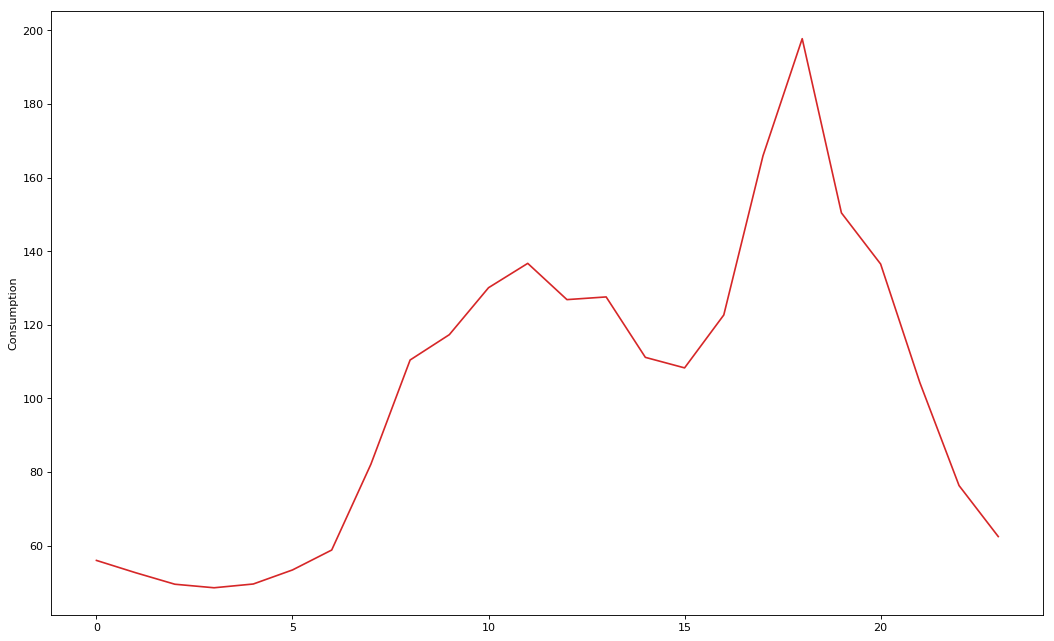

In [13]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Hour', 'Consumption', data=df_hour, color='tab:red')
plt.ylabel('Consumption')
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

The above diagram shows that there is a strong relation between hour and consumption.

Grouping consumption per BusinessHour and Weekday, to realize how it is related with that feature.

In [14]:
df_businesshours=df.groupby(['BusinessHour']).Consumption.mean()
df_businesshours=df_businesshours.to_frame().reset_index()
df_businesshours

,BusinessHour,Consumption
0,0,90.959039
1,1,122.583637


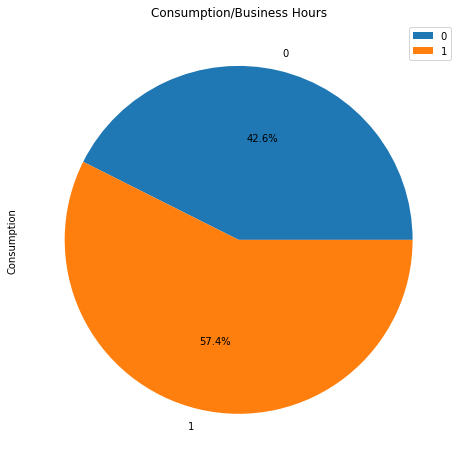

In [15]:
#df_weekday.plot(kind='pie',  figsize=(8, 8), dpi= 80)
df_businesshours.plot(kind='pie', 
                x='BusinessHour',
                y='Consumption',
                autopct='%1.1f%%',
                labels=df_businesshours['BusinessHour'],
                title='Consumption/Business Hours',
                figsize =(12,8))

In [16]:
df_weekday=df.groupby(['Daytype']).Consumption.mean()
df_weekday=df_weekday.to_frame().reset_index()
df_weekday

,Daytype,Consumption
0,0,103.724415
1,1,100.642221


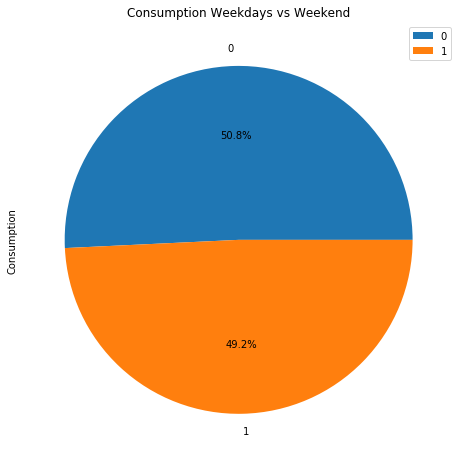

In [17]:
#df_weekday.plot(kind='pie',  figsize=(8, 8), dpi= 80)
df_weekday.plot(kind='pie', 
                x='Daytype',
                y='Consumption',
                autopct='%1.1f%%',
                labels=df_weekday['Daytype'],
                title='Consumption Weekdays vs Weekend',
                figsize =(12,8))

We realize that consumption is divided almost equally between two categories. Thus, I suppose that there is no reason to include these parameters in our prediction model.

In [18]:
#df.index = pd.to_datetime(df.date, unit='s')

In [19]:
#df_30min = df.resample('30Min').mean().round(0).reset_index()

Grouping dataset per hour

In [20]:
#group by date with mean aggregation
df_60min=df.groupby(pd.Grouper(key='date', freq='60min', axis=1)).mean().round(0).reset_index()

In [21]:
df_60min

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,Consumption,Hour,Day,Months,Daytype,BusinessHour
0,2016-01-11 17:00:00,55.0,35.0,20.0,47.0,19.0,45.0,20.0,45.0,19.0,...,53.0,5.0,27.0,27.0,90.0,17.0,11.0,1.0,1.0,0.0
1,2016-01-11 18:00:00,177.0,52.0,20.0,46.0,19.0,44.0,20.0,45.0,19.0,...,40.0,5.0,22.0,22.0,228.0,18.0,11.0,1.0,1.0,0.0
2,2016-01-11 19:00:00,173.0,25.0,20.0,53.0,20.0,46.0,20.0,47.0,19.0,...,40.0,4.0,34.0,34.0,198.0,19.0,11.0,1.0,1.0,0.0
3,2016-01-11 20:00:00,125.0,35.0,21.0,48.0,20.0,46.0,20.0,47.0,19.0,...,40.0,4.0,26.0,26.0,160.0,20.0,11.0,1.0,1.0,0.0
4,2016-01-11 21:00:00,103.0,23.0,21.0,46.0,21.0,45.0,20.0,46.0,19.0,...,40.0,4.0,19.0,19.0,127.0,21.0,11.0,1.0,1.0,0.0
5,2016-01-11 22:00:00,267.0,22.0,22.0,45.0,21.0,44.0,20.0,46.0,20.0,...,40.0,4.0,27.0,27.0,288.0,22.0,11.0,1.0,1.0,0.0
6,2016-01-11 23:00:00,57.0,18.0,22.0,44.0,21.0,44.0,20.0,46.0,21.0,...,32.0,4.0,29.0,29.0,75.0,23.0,11.0,1.0,1.0,0.0
7,2016-01-12 00:00:00,142.0,17.0,21.0,45.0,21.0,44.0,20.0,46.0,21.0,...,30.0,4.0,26.0,26.0,158.0,0.0,12.0,1.0,1.0,0.0
8,2016-01-12 01:00:00,168.0,8.0,21.0,46.0,20.0,44.0,20.0,46.0,22.0,...,40.0,4.0,29.0,29.0,177.0,1.0,12.0,1.0,1.0,0.0
9,2016-01-12 02:00:00,45.0,0.0,21.0,46.0,20.0,45.0,20.0,45.0,21.0,...,40.0,4.0,17.0,17.0,45.0,2.0,12.0,1.0,1.0,0.0


C:\Users\ralli\Anaconda3\envs\practical-data-science\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


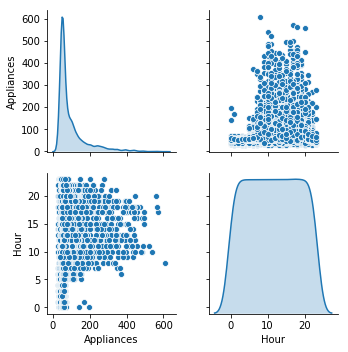

In [22]:
sns.pairplot(df_60min[['Appliances','Hour']],diag_kind="kde")

In [23]:
#While consuption between 00:00 and 05:00 is significant low, I remove data of this period.
#df_60min_day=df_60min[(df_60min['Hour']>=0) & (df_60min['Hour']<=5)]
#df_day=df[(df['Hour']>=0) & (df['Hour']<=5)]

In [24]:
#df_60min_day

# Feature Heat Index

Another feature which will probably improve our model is the heat index.

Heat Index or “feels like temperature” is an index that combines air temperature and relative humidity in an attempt to determine the human-perceived equivalent temperature.
https://pypi.org/project/meteocalc/

In [25]:
from meteocalc import Temp, dew_point, heat_index


In [26]:
df_60min.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,Consumption,Hour,Day,Months,Daytype,BusinessHour
0,2016-01-11 17:00:00,55.0,35.0,20.0,47.0,19.0,45.0,20.0,45.0,19.0,...,53.0,5.0,27.0,27.0,90.0,17.0,11.0,1.0,1.0,0.0
1,2016-01-11 18:00:00,177.0,52.0,20.0,46.0,19.0,44.0,20.0,45.0,19.0,...,40.0,5.0,22.0,22.0,228.0,18.0,11.0,1.0,1.0,0.0
2,2016-01-11 19:00:00,173.0,25.0,20.0,53.0,20.0,46.0,20.0,47.0,19.0,...,40.0,4.0,34.0,34.0,198.0,19.0,11.0,1.0,1.0,0.0
3,2016-01-11 20:00:00,125.0,35.0,21.0,48.0,20.0,46.0,20.0,47.0,19.0,...,40.0,4.0,26.0,26.0,160.0,20.0,11.0,1.0,1.0,0.0
4,2016-01-11 21:00:00,103.0,23.0,21.0,46.0,21.0,45.0,20.0,46.0,19.0,...,40.0,4.0,19.0,19.0,127.0,21.0,11.0,1.0,1.0,0.0


In [27]:
#hi=heat_index(temperature=10, humidity=100)

In [28]:
df_60min['HI1'] = df_60min.apply(lambda row: heat_index(temperature=row['T1'], humidity=row['RH_1']), axis=1).astype(float)
df_60min['HI2'] = df_60min.apply(lambda row: heat_index(temperature=row['T2'], humidity=row['RH_2']), axis=1).astype(float)
df_60min['HI3'] = df_60min.apply(lambda row: heat_index(temperature=row['T3'], humidity=row['RH_3']), axis=1).astype(float)
df_60min['HI4'] = df_60min.apply(lambda row: heat_index(temperature=row['T4'], humidity=row['RH_4']), axis=1).astype(float)
df_60min['HI5'] = df_60min.apply(lambda row: heat_index(temperature=row['T5'], humidity=row['RH_5']), axis=1).astype(float)
df_60min['HI6'] = df_60min.apply(lambda row: heat_index(temperature=row['T6'], humidity=row['RH_6']), axis=1).astype(float)
df_60min['HI7'] = df_60min.apply(lambda row: heat_index(temperature=row['T7'], humidity=row['RH_7']), axis=1).astype(float)
df_60min['HI8'] = df_60min.apply(lambda row: heat_index(temperature=row['T8'], humidity=row['RH_8']), axis=1).astype(float)
df_60min['HI9'] = df_60min.apply(lambda row: heat_index(temperature=row['T9'], humidity=row['RH_9']), axis=1).astype(float)


In [29]:
df_60min=df_60min.round(0)
df_60min

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,BusinessHour,HI1,HI2,HI3,HI4,HI5,HI6,HI7,HI8,HI9
0,2016-01-11 17:00:00,55.0,35.0,20.0,47.0,19.0,45.0,20.0,45.0,19.0,...,0.0,14.0,13.0,14.0,13.0,11.0,1.0,10.0,12.0,11.0
1,2016-01-11 18:00:00,177.0,52.0,20.0,46.0,19.0,44.0,20.0,45.0,19.0,...,0.0,14.0,13.0,14.0,13.0,11.0,0.0,10.0,12.0,11.0
2,2016-01-11 19:00:00,173.0,25.0,20.0,53.0,20.0,46.0,20.0,47.0,19.0,...,0.0,14.0,14.0,14.0,13.0,11.0,0.0,12.0,12.0,11.0
3,2016-01-11 20:00:00,125.0,35.0,21.0,48.0,20.0,46.0,20.0,47.0,19.0,...,0.0,15.0,14.0,14.0,13.0,13.0,-1.0,12.0,13.0,11.0
4,2016-01-11 21:00:00,103.0,23.0,21.0,46.0,21.0,45.0,20.0,46.0,19.0,...,0.0,15.0,15.0,14.0,13.0,13.0,0.0,12.0,13.0,11.0
5,2016-01-11 22:00:00,267.0,22.0,22.0,45.0,21.0,44.0,20.0,46.0,20.0,...,0.0,16.0,15.0,14.0,14.0,13.0,0.0,12.0,13.0,11.0
6,2016-01-11 23:00:00,57.0,18.0,22.0,44.0,21.0,44.0,20.0,46.0,21.0,...,0.0,16.0,15.0,14.0,15.0,13.0,0.0,12.0,13.0,11.0
7,2016-01-12 00:00:00,142.0,17.0,21.0,45.0,21.0,44.0,20.0,46.0,21.0,...,0.0,15.0,15.0,14.0,15.0,13.0,-1.0,12.0,13.0,11.0
8,2016-01-12 01:00:00,168.0,8.0,21.0,46.0,20.0,44.0,20.0,46.0,22.0,...,0.0,15.0,14.0,14.0,16.0,13.0,-1.0,12.0,13.0,11.0
9,2016-01-12 02:00:00,45.0,0.0,21.0,46.0,20.0,45.0,20.0,45.0,21.0,...,0.0,15.0,14.0,14.0,15.0,13.0,-2.0,12.0,13.0,11.0


# 2. Train 3 different models on the data

# Linear Model

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
df_60min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 44 columns):
date            3290 non-null datetime64[ns]
Appliances      3290 non-null float64
lights          3290 non-null float64
T1              3290 non-null float64
RH_1            3290 non-null float64
T2              3290 non-null float64
RH_2            3290 non-null float64
T3              3290 non-null float64
RH_3            3290 non-null float64
T4              3290 non-null float64
RH_4            3290 non-null float64
T5              3290 non-null float64
RH_5            3290 non-null float64
T6              3290 non-null float64
RH_6            3290 non-null float64
T7              3290 non-null float64
RH_7            3290 non-null float64
T8              3290 non-null float64
RH_8            3290 non-null float64
T9              3290 non-null float64
RH_9            3290 non-null float64
T_out           3290 non-null float64
Press_mm_hg     3290 non-null float64
RH_out      

In [32]:
df_60min.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,BusinessHour,HI1,HI2,HI3,HI4,HI5,HI6,HI7,HI8,HI9
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,...,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,97.786018,3.843465,21.694833,40.258055,20.342249,40.424316,22.260182,39.248632,20.861094,39.023404,...,0.333131,15.542857,13.996049,16.111550,14.493009,13.711246,0.965046,13.583891,16.010942,13.084195
std,81.201403,6.894646,1.635871,3.952127,2.210744,4.067896,2.018106,3.253579,2.061056,4.351017,...,0.471404,1.870581,2.494929,2.236004,2.320238,2.036284,5.827065,2.400298,2.099502,2.312713
min,28.000000,0.000000,17.000000,28.000000,16.000000,21.000000,17.000000,30.000000,15.000000,29.000000,...,0.000000,10.000000,9.000000,10.000000,8.000000,9.000000,-13.000000,8.000000,9.000000,8.000000
25%,50.000000,0.000000,21.000000,37.000000,19.000000,38.000000,21.000000,37.000000,20.000000,36.000000,...,0.000000,14.000000,12.000000,15.000000,13.000000,12.000000,-3.000000,12.000000,15.000000,11.000000
50%,63.000000,0.000000,22.000000,40.000000,20.000000,40.000000,22.000000,39.000000,21.000000,38.000000,...,0.000000,16.000000,14.000000,16.000000,14.000000,14.000000,1.000000,13.000000,16.000000,13.000000
75%,110.000000,3.000000,23.000000,43.000000,22.000000,43.000000,23.000000,42.000000,22.000000,42.000000,...,1.000000,17.000000,15.000000,17.000000,16.000000,15.000000,4.000000,15.000000,17.000000,15.000000
max,608.000000,52.000000,26.000000,54.000000,30.000000,54.000000,29.000000,49.000000,26.000000,51.000000,...,1.000000,21.000000,24.000000,24.000000,21.000000,21.000000,21.000000,20.000000,22.000000,18.000000


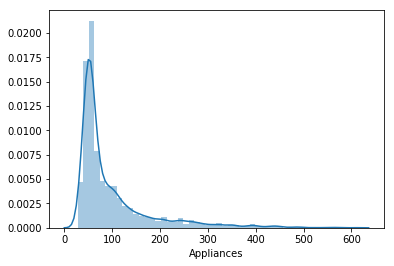

In [33]:
sns.distplot(df_60min['Appliances'])

Below pairplots are created in order to realize whether there is a linear relation between Appliance and parameters.

In [34]:
df_60min_temp1 = df_60min[['Appliances','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
df_60min_temp2 = df_60min[['Appliances','lights','T4', 'RH_4', 'T5', 'RH_5', 'T6']]
df_60min_temp3 = df_60min[['Appliances','lights','T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9','Hour']]
df_60min_temp4 = df_60min[['Consumption','lights','HI1', 'HI2', 'HI3',
       'HI4', 'HI5', 'HI6','HI7','HI8','HI9']]
df_60min_temp5 = df_60min[['Appliances','lights','T5', 'RH_5', 'T6', 'RH_6']]


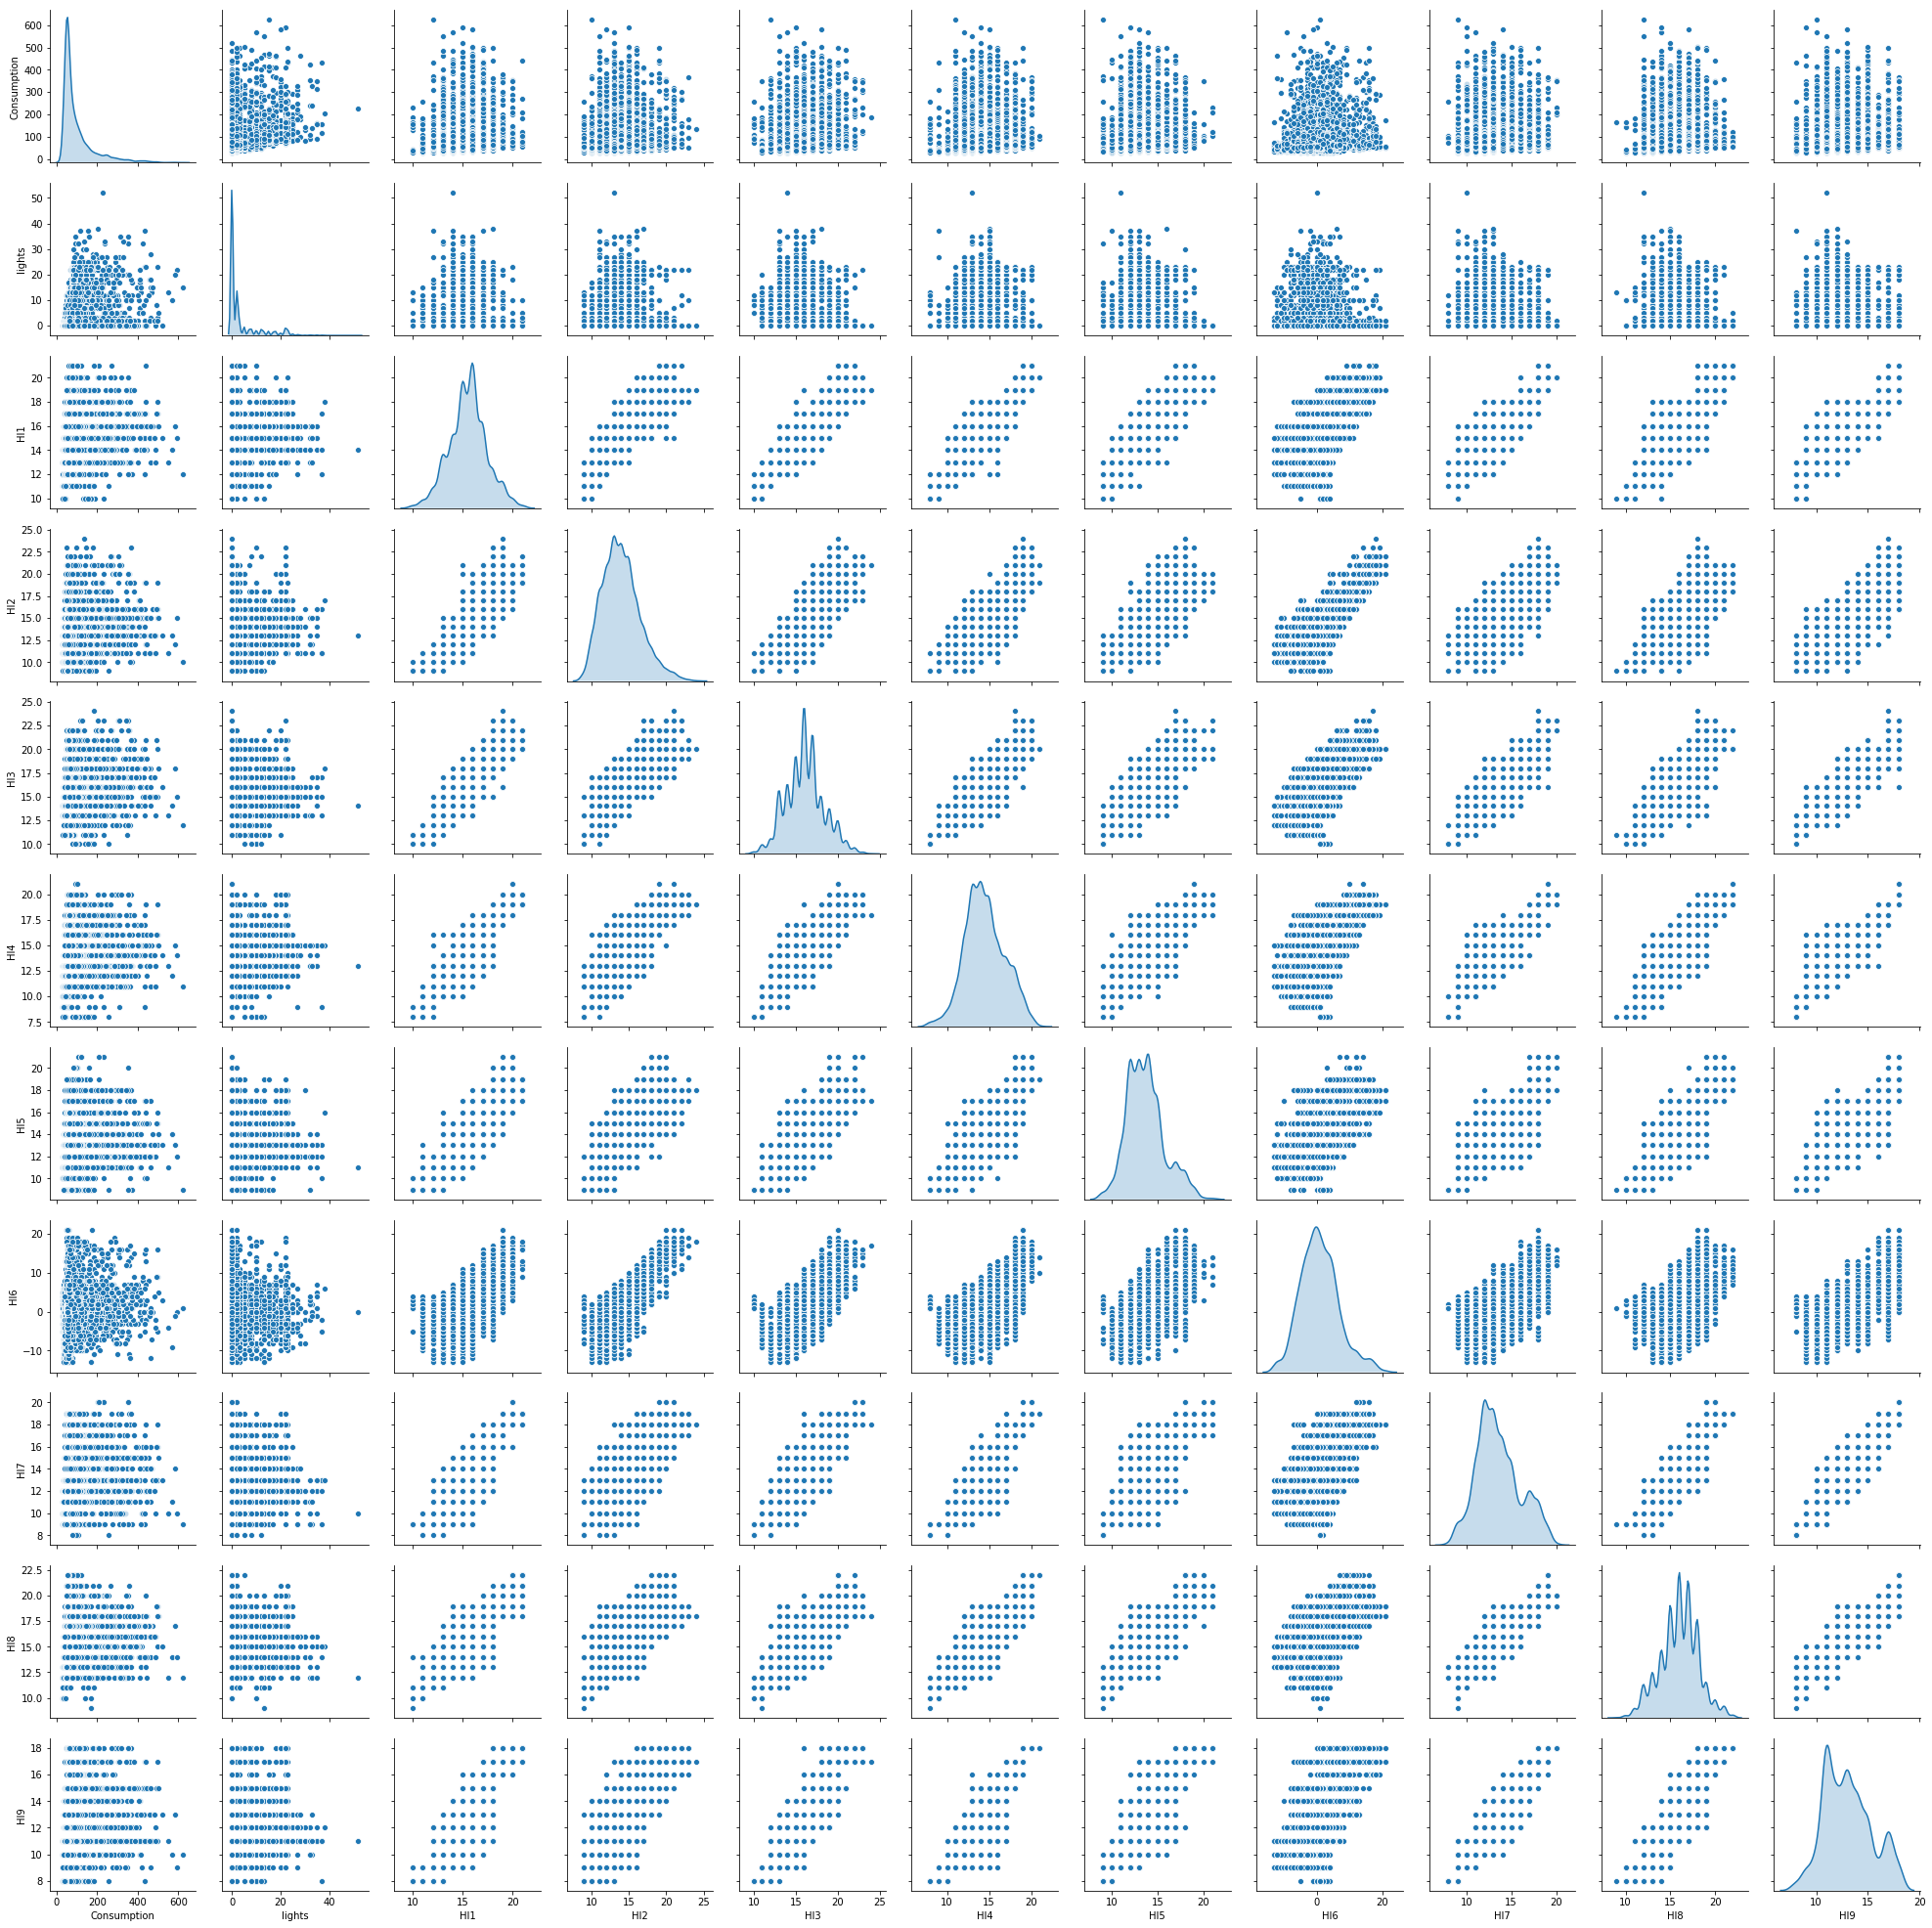

In [35]:
sns.pairplot(df_60min_temp4,diag_kind="kde")

While there is no obvious linearity, I made several tries with different parameters.

Looking carefully at mean and min-max values of each parameter, we realize that bathroom has significant high humidity (as expected) and outside the building parameters have deviance at both temperature and humidity.

In [36]:
df_60min.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Consumption', 'Hour', 'Day',
       'Months', 'Daytype', 'BusinessHour', 'HI1', 'HI2', 'HI3', 'HI4', 'HI5',
       'HI6', 'HI7', 'HI8', 'HI9'],
      dtype='object')

In [37]:
df_60min[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']].describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,7.423708,755.513982,79.734650,4.040122,38.336474,3.761398,24.995137,24.995137
std,5.328644,7.402387,14.832657,2.456722,11.213814,4.206934,5.950743,5.950743
min,-5.000000,729.000000,25.000000,0.000000,1.000000,-6.000000,5.000000,5.000000
25%,4.000000,751.000000,70.000000,2.000000,32.000000,1.000000,21.000000,21.000000
50%,7.000000,756.000000,84.000000,4.000000,40.000000,3.000000,25.000000,25.000000
75%,10.000000,761.000000,92.000000,5.000000,40.000000,7.000000,29.000000,29.000000
max,26.000000,772.000000,100.000000,13.000000,66.000000,15.000000,44.000000,44.000000


In [38]:
df_60min[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9']].describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,21.694833,40.258055,20.342249,40.424316,22.260182,39.248632,20.861094,39.023404,19.595441,50.949544,7.915198,54.601520,20.263526,35.402128,22.027052,42.934650,19.497568,41.551976
std,1.635871,3.952127,2.210744,4.067896,2.018106,3.253579,2.061056,4.351017,1.865868,8.639562,6.083421,31.119307,2.133898,5.113102,1.969252,5.227653,2.045282,4.151641
min,17.000000,28.000000,16.000000,21.000000,17.000000,30.000000,15.000000,29.000000,15.000000,30.000000,-6.000000,1.000000,15.000000,23.000000,16.000000,30.000000,15.000000,29.000000
25%,21.000000,37.000000,19.000000,38.000000,21.000000,37.000000,20.000000,36.000000,18.000000,45.000000,4.000000,30.000000,19.000000,32.000000,21.000000,39.000000,18.000000,39.000000
50%,22.000000,40.000000,20.000000,40.000000,22.000000,39.000000,21.000000,38.000000,19.000000,49.000000,7.000000,55.000000,20.000000,35.000000,22.000000,42.000000,19.000000,41.000000
75%,23.000000,43.000000,22.000000,43.000000,23.000000,42.000000,22.000000,42.000000,21.000000,54.000000,11.000000,83.000000,22.000000,39.000000,23.000000,47.000000,21.000000,44.000000
max,26.000000,54.000000,30.000000,54.000000,29.000000,49.000000,26.000000,51.000000,26.000000,95.000000,28.000000,100.000000,26.000000,51.000000,27.000000,59.000000,24.000000,53.000000


Train Linear Model

In [39]:
#Temperature and humidity on specific rooms:  kitchen area, living room, laundry room, ironing room
#0.30
X=df_60min[['T1', 'RH_1','T2', 'RH_2', 'T3',
       'RH_3', 'T7', 'RH_7', 'Hour','BusinessHour','Daytype','Day','Months']]

In [40]:
#0.33
X=df_60min[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4','T5', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'Hour','BusinessHour','Daytype','Day','Months']]

In [41]:
#SCORE  0.24
X=df_60min[['HI1', 'HI2', 'HI3', 'HI4', 'HI7', 'HI8', 'HI9','Hour','BusinessHour','Daytype','Day','Months']]

In [42]:
#Temperature and humidity on specific rooms:  kitchen area, living room, laundry room, ironing room
# 0.24
X=df_60min[['HI1', 'HI2', 'HI3', 'HI7', 'HI8', 'Hour','BusinessHour','Daytype','Day','Months']]

Finally the best r2 score of linear model was permorfed with all parameters.

In [43]:
# SCORE 0.34
X_linear=df_60min[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4','T5', 'RH_5','T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9','Hour','BusinessHour','Daytype','Day','Months','T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']]

Furthermore a better prediction was performed whith the logarithm of Appliances

In [44]:
y=np.log1p(df_60min['Appliances'])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#y_test - οι πραγματικές τιμές κατανάλωσης
#X_test - οι πραγματικές τιμές των παραμέτρων 
#split dataset, 70% train data and 30% test data
#use random_state in order to split data with the same way in several executions
X_train, X_test, y_train, y_test = train_test_split(X_linear, y, test_size=0.3, random_state=101)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()

In [49]:
#fit train data sets to linear model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
#print(lm.intercept_)

In [51]:
# Make predictions for y using the testing set and the linear model
predictions = lm.predict(X_test)

In [52]:
from sklearn import metrics

In [53]:
metrics.mean_absolute_error(y_test,predictions)

0.3656422852792899

In [54]:
metrics.mean_squared_error(y_test,predictions)

0.23572520751467296

In [55]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.48551540399319254

In [56]:
metrics.explained_variance_score(y_test,predictions)

0.34618864423691875

In [57]:
#Split dataset into k consecutive folds (without shuffling by default).
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lm, X, y, cv=cv, scoring='r2')
print(scores)

[0.18567298 0.17609822 0.21111221 0.2146328  0.22182083 0.19966037
 0.209745   0.23837924 0.19278108 0.20828033]


Coefficients: 
 [ 0.0469461   0.1267989  -0.13469195 -0.09443691  0.14426473  0.01120651
  0.02490917 -0.00239659  0.00921986  0.00217983  0.04188228 -0.00031773
 -0.03635373 -0.01079028  0.05556047 -0.04003535 -0.0606545  -0.00505137
  0.01438653  0.09495463 -0.06460596 -0.00106052 -0.10500149 -0.0230328
 -0.00077315  0.00601876  0.01464283  0.00189047 -0.00890932 -0.00068825
 -0.00068825]
Mean squared error: 0.24
Variance score: 0.35


Text(0, 0.5, 'Predicted values')

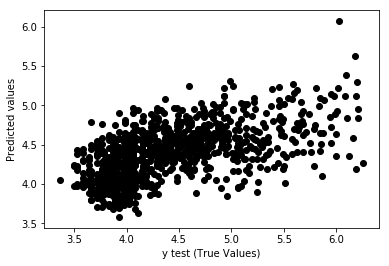

In [62]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

# Plot outputs
plt.scatter(y_test, predictions,  color='black')
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')


C:\Users\ralli\Anaconda3\envs\practical-data-science\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


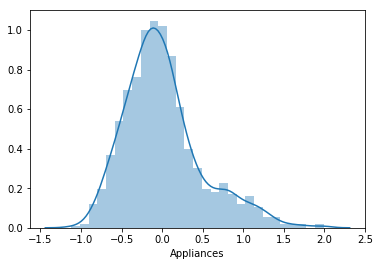

In [63]:
#Histogram of the residuals
#substract predictions from real values to take the residuals
sns.distplot(y_test-predictions)

While residuals do not form a normal distribution, probably our model is not the appropriate.

In [65]:
cdf = pd.DataFrame(lm.coef_,X_linear.columns,columns=['Coeff'])

In [66]:
cdf

,Coeff
T1,0.046946
RH_1,0.126799
T2,-0.134692
RH_2,-0.094437
T3,0.144265
RH_3,0.011207
T4,0.024909
RH_4,-0.002397
T5,0.009220
RH_5,0.002180


# SVM-based regression model 

Train SVM model

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
df_60min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 44 columns):
date            3290 non-null datetime64[ns]
Appliances      3290 non-null float64
lights          3290 non-null float64
T1              3290 non-null float64
RH_1            3290 non-null float64
T2              3290 non-null float64
RH_2            3290 non-null float64
T3              3290 non-null float64
RH_3            3290 non-null float64
T4              3290 non-null float64
RH_4            3290 non-null float64
T5              3290 non-null float64
RH_5            3290 non-null float64
T6              3290 non-null float64
RH_6            3290 non-null float64
T7              3290 non-null float64
RH_7            3290 non-null float64
T8              3290 non-null float64
RH_8            3290 non-null float64
T9              3290 non-null float64
RH_9            3290 non-null float64
T_out           3290 non-null float64
Press_mm_hg     3290 non-null float64
RH_out      

In [69]:
#SCORE 0.13
X=df_60min[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4','T5', 'RH_5','T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9','Hour','BusinessHour','Daytype','Day','Months','T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']]

In [70]:
#Temperature and humidity on specific rooms:  kitchen area, living room, laundry room, ironing room
#0.5361505402837488
X=df_60min[['T1', 'RH_1','T2', 'RH_2', 'T3',
       'RH_3', 'T7', 'RH_7', 'Hour','BusinessHour','Daytype','Day','Months']]

In [71]:
#0.5317945400918743
X=df_60min[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4','T5', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'Hour','BusinessHour','Daytype','Day','Months']]

Using heat index features of rooms is achieved the best score of my expirements for svr model.

In [72]:
#SCORE 0.5589432731870907
X=df_60min[['HI1', 'HI2', 'HI3', 'HI4', 'HI7', 'HI8', 'HI9','Hour','BusinessHour','Daytype','Day','Months']]

In [73]:
y=np.log1p(df_60min['Appliances'])

In [74]:
#np.log1p(55.0)
#np.e**4.02535169073515

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [76]:
from sklearn.svm import SVR

In [77]:
svr_model = SVR(gamma='auto')

In [78]:
#fit the model
svr_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Model evaluation

In [79]:
predictions = svr_model.predict(X_test)

In [80]:
from sklearn.metrics import r2_score


In [81]:
print(r2_score(y_test,predictions))

0.5628616230147385


In [82]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))


Variance score: 0.56


Variance score: 0.56


Text(0, 0.5, 'Predicted values')

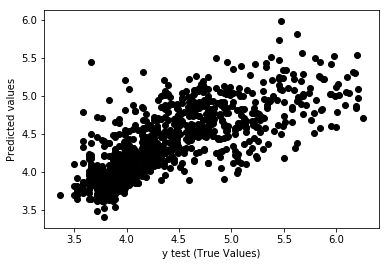

In [83]:
print('Variance score: %.2f' % r2_score(y_test, predictions))

# Plot outputs
plt.scatter(y_test, predictions,  color='black')
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

In [84]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svr_model, X, y, cv=cv, scoring='r2')
print(scores)

[0.53084719 0.57572623 0.56833188 0.53478245 0.5593926 ]


# Decision Trees

Same approach for decision tree.

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
#SCORE 0.4318907170470663
X=df_60min[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4','T5', 'RH_5','T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9','Hour','BusinessHour','Daytype','Day','Months','T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']]

In [87]:
#Temperature and humidity on specific rooms:  kitchen area, living room, laundry room, ironing room
#SCORE 0.42529259827552235
X=df_60min[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4','T5', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'Hour','BusinessHour','Daytype','Day','Months']]

In [88]:
#Temperature and humidity on specific rooms:  kitchen area, living room, laundry room, ironing room
#0.43131240239380997
X=df_60min[['HI1', 'HI2', 'HI3', 'HI7', 'HI8', 'Hour','BusinessHour','Daytype','Day','Months']]

In [89]:
#SCORE 0.4325221067372288
X=df_60min[['HI1', 'HI2', 'HI3', 'HI4', 'HI7', 'HI8', 'HI9','Hour','BusinessHour','Daytype','Day','Months']]

Using heat index features of rooms is achieved the best score of my expirements for random forest too.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
rfr_model = RandomForestRegressor(max_depth=5,n_estimators=1000,random_state = 101)

In [92]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [93]:
predictions =rfr_model.predict(X_test)

In [94]:
print(r2_score(y_test,predictions))

0.43399443859670916


In [95]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.32 degrees.


In [96]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.95 %.


In [97]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rfr_model.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = list(X.columns), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [98]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfr_model, X, y, cv=cv, scoring='r2')
print(scores)

[0.42638447 0.40598956 0.39948235 0.39807333 0.44327149]


Variance score: 0.43


Text(0, 0.5, 'Predicted values')

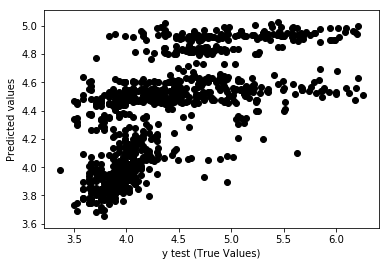

In [99]:
print('Variance score: %.2f' % r2_score(y_test, predictions))

# Plot outputs
plt.scatter(y_test, predictions,  color='black')
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

# 3. Model Evaluation & Selection

This part has been answered explicitly above.

summarize

Linear Model

In [100]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lm, X_linear, y, cv=cv, scoring='r2')
print(scores)

[0.34902733 0.30355597 0.27053884 0.30405664 0.30714655 0.33348166
 0.33141799 0.3102118  0.25125423 0.32240988]


SVM-based regression model

In [101]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svr_model, X, y, cv=cv, scoring='r2')
print(scores)

[0.58163656 0.51212532 0.60941399 0.59255003 0.58702594 0.58125296
 0.57629743 0.52459123 0.58058976 0.5411544 ]


RandomForest model

In [102]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rfr_model, X, y, cv=cv, scoring='r2')
print(scores)

[0.47130854 0.37181757 0.38536933 0.45492012 0.38139466 0.42901234
 0.40029491 0.39539886 0.47049081 0.38830851]


As a result, we observe that SVM-based regression model predict our test data with better r2_score than the two other models.

# 4. Parameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
#copy_X=True, fit_intercept=True, n_jobs=None,normalize=False
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [106]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\ralli\Anaconda3\envs\practical-data-science\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   16.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [107]:
grid_predictions = grid.predict(X_test)

In [108]:
print('Variance score: %.2f' % r2_score(y_test, grid_predictions))
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

Variance score: 0.56
Residual sum of squares: 0.16


However a major issue appeared when the svr model was called via the api. The prediction value was constant for any input. 
After some search on google I found that the gamma of svr model should be significant low. But this did not work for me. So I decided to use the Random Forest model.

I would appreciate if you give me feedback about the aforementioned issue.

In [109]:

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [111]:
grid_rfr = GridSearchCV(RandomForestRegressor(), param_grid, cv= 5)
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
grid_predictions = grid_rfr.predict(X_test)

In [114]:
print('Variance score: %.2f' % r2_score(y_test, grid_predictions))
print("Residual sum of squares: %.2f"
              % np.mean((grid_rfr.predict(X_test) - y_test) ** 2))

Variance score: 0.52
Residual sum of squares: 0.17


Model grid_rfr will be used at assignment 3

# Assignment 3

1. Model Persistence

In [115]:
from joblib import dump, load


In [116]:
dump(grid_rfr, 'load_forecasting_model_v010.joblib') 

['load_forecasting_model_v010.joblib']